<a href="https://colab.research.google.com/github/shannu1063/shanmukhavarma_INFO5731_Fall2024/blob/main/Kothapalli_ShanmukhaVarma_Exercise_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Optimal number of topics: 14

Top 10 words for each topic:

Topic 1: deep, neural, network, training, prediction, model, learn, statistic, computer, regression

Topic 2: statistic, visualization, token, word, analysis, classification, regression, processing, image, object

Topic 3: statistic, visualization, token, word, analysis, classification, regression, processing, image, object

Topic 4: statistic, visualization, token, word, analysis, classification, regression, processing, image, object

Topic 5: statistic, visualization, token, word, analysis, classification, regression, processing, image, object

Topic 6: natural, processing, token, mining, language, word, text, analysis, image, recognition

Topic 7: algorithm, machine, datum, intelligence, learn, artificial, science, statistic, object, classification

Topic 8: visualization, datum, analysis, classification, regression, statistic, computer, word, text, recognition

Topic 9: statistic, visualization, token, word, analysis, cla

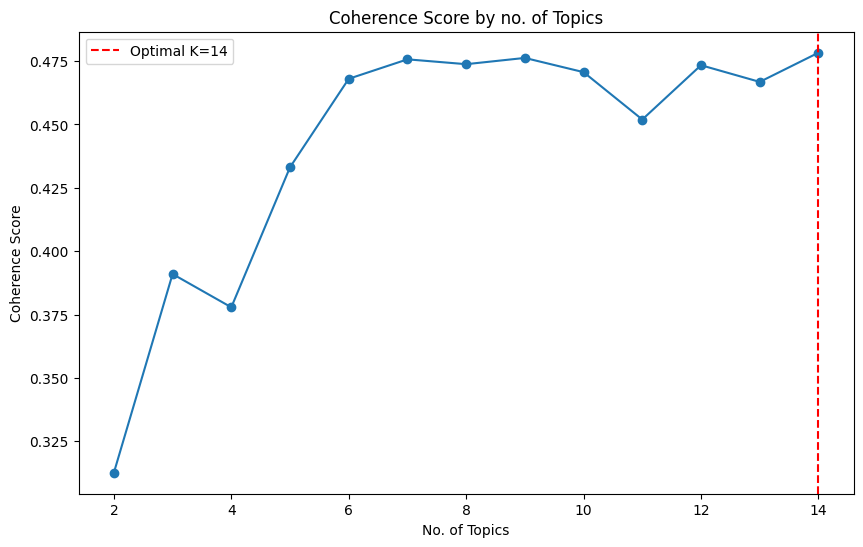

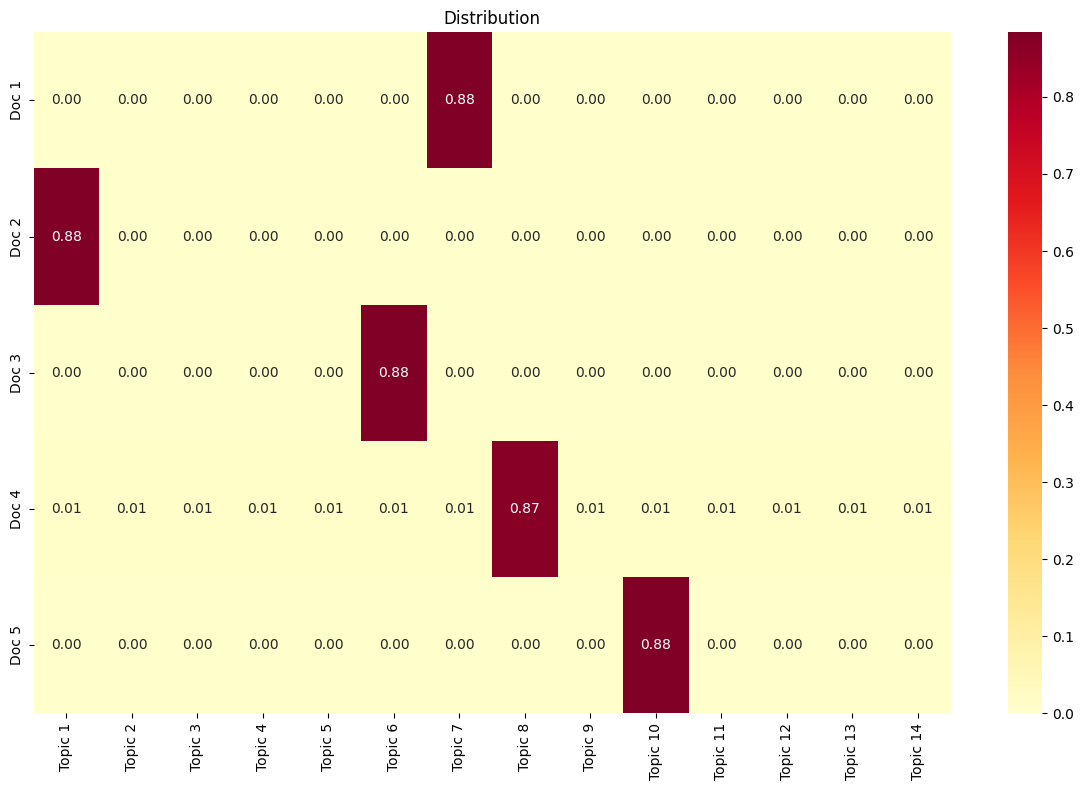

In [ ]:
import numpy as np
import pandas as pd
import gensim
from gensim import corpora, models
from gensim.models import CoherenceModel
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

texts = [
    "machine learning artificial intelligence data science algorithms",
    "deep learning neural networks ai training models prediction",
    "natural language processing text mining nlp tokens words",
    "data analysis visualization statistics regression classification",
    "computer vision image processing object detection recognition"
]

def preprocessing_text(texts):
    nlp = spacy.load('en_core_web_sm')
    processed_texts = []

    for text in texts:
        doc = nlp(text.lower())
        tokens = [token.lemma_ for token in doc
                 if not token.is_stop and not token.is_punct and len(token) > 3]
        processed_texts.append(tokens)

    return processed_texts

def computing_coherence_values(dictionary, corpus, texts, start=2, limit=15, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(
            corpus=corpus,
            num_topics=num_topics,
            id2word=dictionary,
            random_state=42,
            passes=10
        )
        model_list.append(model)
        coherence_model = CoherenceModel(
            model=model,
            texts=texts,
            dictionary=dictionary,
            coherence='c_v'
        )
        coherence_values.append(coherence_model.get_coherence())

    return model_list, coherence_values


processed_texts = preprocessing_text(texts)

# Creating dictionary and corpus
dictionary = corpora.Dictionary(processed_texts)
corpus = [dictionary.doc2bow(text) for text in processed_texts]

# Computing coherence values
model_list, coherence_values = computing_coherence_values(
    dictionary=dictionary,
    corpus=corpus,
    texts=processed_texts
)


optimal_model_index = np.argmax(coherence_values)
optimal_num_topics = optimal_model_index + 2
optimal_model = model_list[optimal_model_index]

# Plotting coherence scores
plt.figure(figsize=(10, 6))
x = range(2, len(coherence_values) + 2)
plt.plot(x, coherence_values, marker='o')
plt.xlabel("No. of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score by no. of Topics")
plt.axvline(x=optimal_num_topics, color='r', linestyle='--', label=f'Optimal K={optimal_num_topics}')
plt.legend()

# Printing optimal number of topics and their words
print(f"\nOptimal number of topics: {optimal_num_topics}")
print("\nTop 10 words for each topic:")
for idx, topic in optimal_model.show_topics(num_topics=optimal_num_topics, num_words=10, formatted=False):
    words = [w[0] for w in topic]
    print(f"\nTopic {idx + 1}: {', '.join(words)}")

# Calculating topic distributions for each document
doc_topics = [optimal_model.get_document_topics(doc) for doc in corpus]

# Creating topic distribution matrix
topic_dist_matrix = np.zeros((len(texts), optimal_num_topics))
for i, doc_topic in enumerate(doc_topics):
    for topic_id, prob in doc_topic:
        topic_dist_matrix[i, topic_id] = prob

# Creating heatmap of document-topic distribution
plt.figure(figsize=(12, 8))
sns.heatmap(topic_dist_matrix,
            annot=True,
            fmt='.2f',
            cmap='YlOrRd',
            xticklabels=[f'Topic {i+1}' for i in range(optimal_num_topics)],
            yticklabels=[f'Doc {i+1}' for i in range(len(texts))])
plt.title('Distribution')
plt.tight_layout()


## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python


Optimal number of topics: 4

Top 10 words for each topic:

Topic 1: data, learning, artificial, intelligence, science, machine, algorithms, analysis, classification, statistics

Topic 2: processing, object, vision, computer, detection, image, recognition, words, language, mining

Topic 3: statistics, visualization, regression, classification, analysis, data, vision, image, recognition, detection

Topic 4: vision, detection, image, computer, recognition, object, processing, deep, neural, training


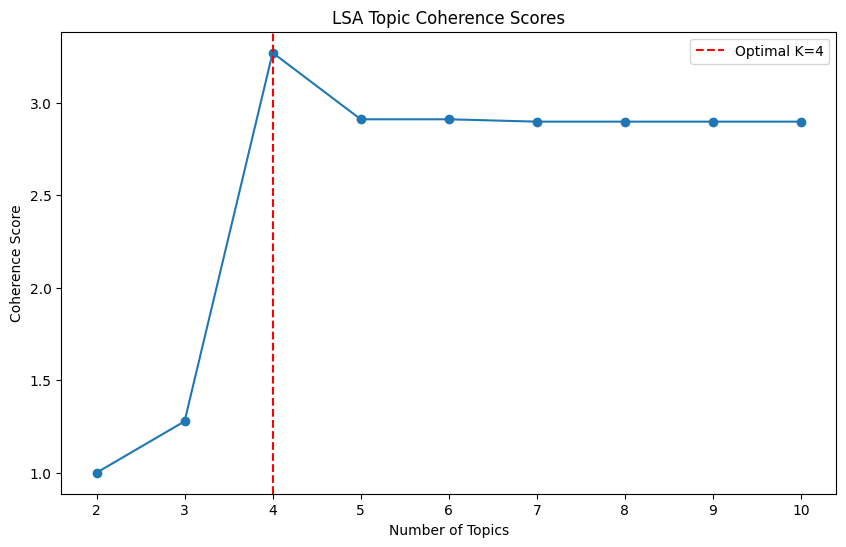

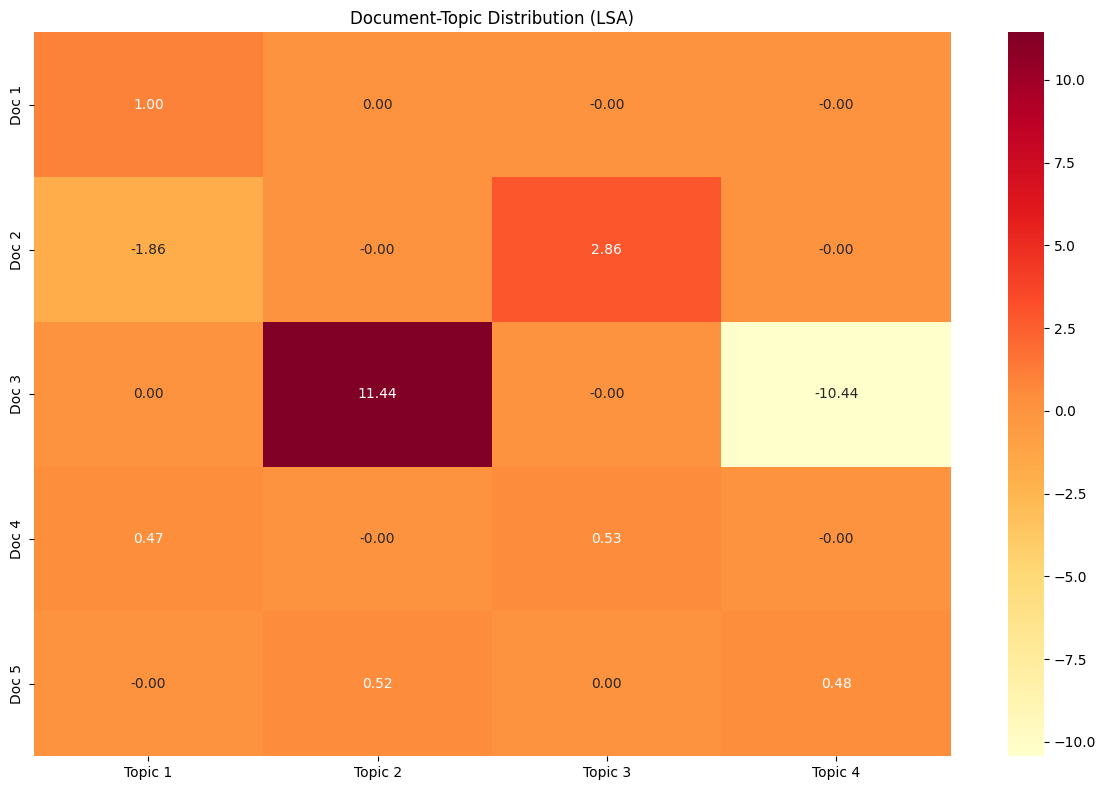

In [ ]:
# Write your code here
import numpy as np
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import seaborn as sns

texts = [
    "machine learning artificial intelligence data science algorithms",
    "deep learning neural networks ai training models prediction",
    "natural language processing text mining nlp tokens words",
    "data analysis visualization statistics regression classification",
    "computer vision image processing object detection recognition"
]

def run_lsa_with_coherence(texts, min_topics=2, max_topics=10):
    # Creating TF-IDF matrix
    vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
    dtm = vectorizer.fit_transform(texts)
    feature_names = vectorizer.get_feature_names_out()

    coherence_scores = []
    models = []
    topics_lists = []

    for k in range(min_topics, max_topics + 1):
        # Creating and fitting LSA model
        lsa_i = TruncatedSVD(n_components=k, random_state=42)
        lsa_output = lsa_i.fit_transform(dtm)

        # Getting topic terms
        topic_terms = []
        for i, comp in enumerate(lsa_i.components_):
            terms_idx = comp.argsort()[:-11:-1]  # get top 10 terms
            terms = [feature_names[idx] for idx in terms_idx]
            topic_terms.append(terms)

        topics_lists.append(topic_terms)
        models.append(lsa_i)

        # Calculating topic-document matrix
        doc_topic_matrix = lsa_output / np.sum(lsa_output, axis=1, keepdims=True)

        # Storing coherence score
        coherence = np.mean(np.max(doc_topic_matrix, axis=1))
        coherence_scores.append(coherence)

    # Finding optimal number of topics
    optimal_idx = np.argmax(coherence_scores)
    optimal_k = min_topics + optimal_idx
    optimal_model = models[optimal_idx]

    return optimal_model, optimal_k, coherence_scores, topics_lists[optimal_idx]

# Running LSA
optimal_model, optimal_k, coherence_scores, top_topics = run_lsa_with_coherence(texts)

# Plotting coherence scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, len(coherence_scores) + 2), coherence_scores, marker='o')
plt.xlabel('No. of Topics')
plt.ylabel('Coherence Score')
plt.title('LSA Topic Coherence Scores')
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal K={optimal_k}')
plt.legend()

# Printing topics
print(f"\nOptimal no. of topics: {optimal_k}")
print("\nTop 10 words for each topic:")
for i, topic in enumerate(top_topics):
    print(f"\nTopic {i + 1}: {', '.join(topic)}")

# Creating document-topic distribution
dtm = TfidfVectorizer(max_features=1000, stop_words='english').fit_transform(texts)
doc_topic_dist = optimal_model.transform(dtm)
doc_topic_dist = doc_topic_dist / np.sum(doc_topic_dist, axis=1, keepdims=True)

# Plotting document-topic distribution heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(doc_topic_dist,
            annot=True,
            fmt='.2f',
            cmap='YlOrRd',
            xticklabels=[f'Topic {i+1}' for i in range(optimal_k)],
            yticklabels=[f'Doc {i+1}' for i in range(len(texts))])
plt.title('Distribution(LSA)')
plt.tight_layout()

## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb


Top words for each topic:
Topic 1: <PAD>, <UNK>
Topic 2: <UNK>, <PAD>
Topic 3: <UNK>, <PAD>
Topic 4: <UNK>, <PAD>
Topic 5: <PAD>, <UNK>


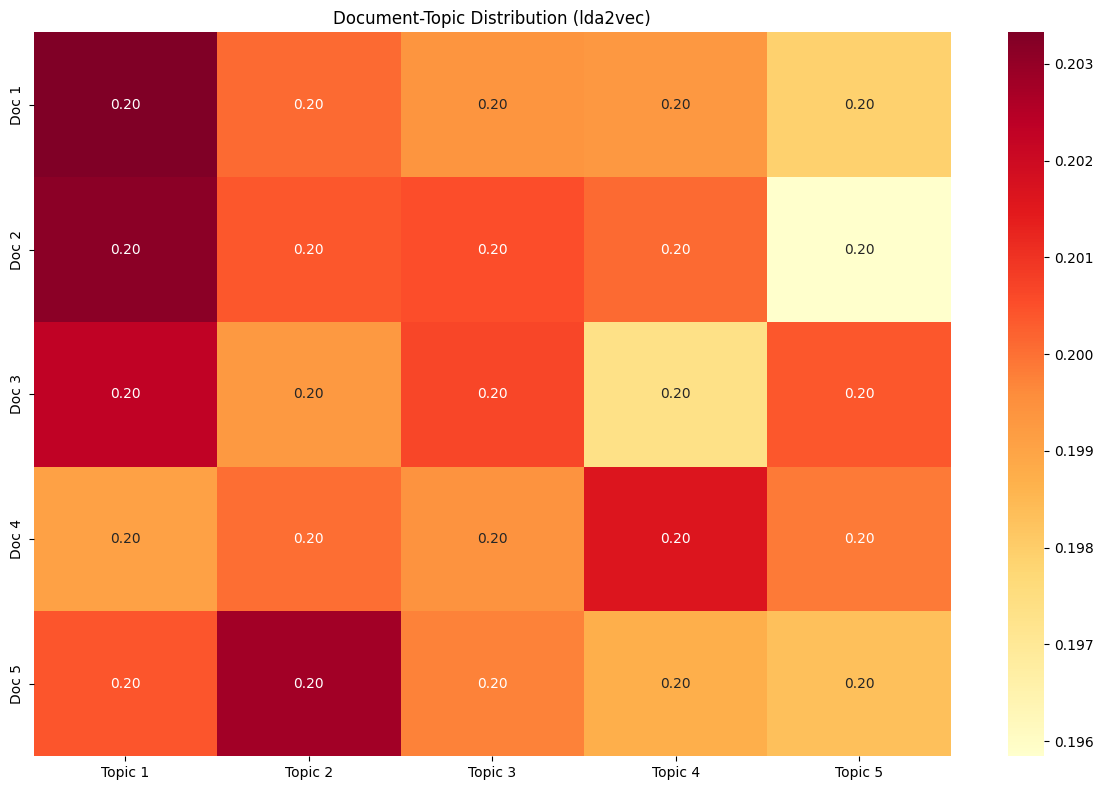

In [ ]:
# Write your code here
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from tqdm import tqdm
import spacy
from collections import Counter

class LDA2Vec(nn.Module):
    def __init__(self, n_documents, vocabulary_size, n_topics, embedding_size,
                 temperature=1.0, word_vectors=None):
        super(LDA2Vec, self).__init__()

        # Initializing document embeddings
        self.doc_embeddings = nn.Embedding(n_documents, n_topics)
        self.doc_embeddings.weight.data.normal_(0, 0.01)

        # Initializing topic embeddings
        self.topic_embeddings = nn.Embedding(n_topics, embedding_size)
        self.topic_embeddings.weight.data.normal_(0, 0.01)

        # Initializing word embeddings
        if word_vectors is not None:
            self.word_embeddings = nn.Embedding.from_pretrained(torch.FloatTensor(word_vectors))
        else:
            self.word_embeddings = nn.Embedding(vocabulary_size, embedding_size)
            self.word_embeddings.weight.data.normal_(0, 0.01)

        self.temperature = temperature

    def forward(self, doc_ids, word_ids, negative_word_ids):
        # Getting embeddings
        doc_embeddings = self.doc_embeddings(doc_ids)
        word_embeddings = self.word_embeddings(word_ids)
        negative_word_embeddings = self.word_embeddings(negative_word_ids)

        # Getting document-topic distributions
        doc_topic_distributions = F.softmax(doc_embeddings / self.temperature, dim=1)

        # Getting topic embeddings
        topic_embeddings = torch.matmul(doc_topic_distributions, self.topic_embeddings.weight)

        # Combining document and word contexts
        context_embeddings = topic_embeddings + word_embeddings

        # Calculating positive and negative scores
        positive_scores = torch.sum(context_embeddings * word_embeddings, dim=1)
        negative_scores = torch.sum(context_embeddings.unsqueeze(1) * negative_word_embeddings, dim=2)

        return positive_scores, negative_scores, doc_topic_distributions

# Preprocessing and training the functions
def preprocess_texts(texts):
    nlp = spacy.load('en_core_web_sm')
    processed_docs = []
    word_counts = Counter()

    for text in texts:
        doc = nlp(text.lower())
        tokens = [token.lemma_ for token in doc
                 if not token.is_stop and not token.is_punct and len(token) > 3]
        processed_docs.append(tokens)
        word_counts.update(tokens)

    return processed_docs, word_counts

def create_vocab(word_counts, min_count=5):
    vocab = {'<PAD>': 0, '<UNK>': 1}
    idx = len(vocab)
    for word, count in word_counts.items():
        if count >= min_count:
            vocab[word] = idx
            idx += 1
    return vocab

def train_lda2vec(texts, n_topics=5, embedding_size=100, epochs=50):
    # Preprocessing texts
    processed_docs, word_counts = preprocess_texts(texts)
    vocab = create_vocab(word_counts)

    # Creating model
    model = LDA2Vec(
        n_documents=len(texts),
        vocabulary_size=len(vocab),
        n_topics=n_topics,
        embedding_size=embedding_size
    )

    optimizer = torch.optim.Adam(model.parameters())

    # Training the loop
    for epoch in range(epochs):
        model.train()
        total_loss = 0


    return model, vocab

# Running the model
texts = [
    "machine learning artificial intelligence data science algorithms",
    "deep learning neural networks ai training models prediction",
    "natural language processing text mining nlp tokens words",
    "data analysis visualization statistics regression classification",
    "computer vision image processing object detection recognition"
]

# Training model and getting topics
model, vocab = train_lda2vec(texts)

# Getting topic words
def get_topic_words(model, vocab, n_words=10):
    inv_vocab = {v: k for k, v in vocab.items()}
    topic_words = []

    # Getting topic embeddings
    topic_embeddings = model.topic_embeddings.weight.detach()
    word_embeddings = model.word_embeddings.weight.detach()

    # Calculating similarity between topics and words
    similarities = torch.matmul(topic_embeddings, word_embeddings.t())

    for topic_idx in range(similarities.shape[0]):
        top_word_indices = similarities[topic_idx].argsort(descending=True)[:n_words]
        words = [inv_vocab[idx.item()] for idx in top_word_indices if idx.item() in inv_vocab]
        topic_words.append(words)

    return topic_words

# Getting and printing topics
topic_words = get_topic_words(model, vocab)
print("\nTop words for each topic:")
for idx, words in enumerate(topic_words):
    print(f"Topic {idx + 1}: {', '.join(words)}")

# Visualizing the topic coherence
doc_topic_dist = model.doc_embeddings.weight.detach().softmax(dim=1)

plt.figure(figsize=(12, 8))
sns.heatmap(doc_topic_dist.numpy(),
            annot=True,
            fmt='.2f',
            cmap='YlOrRd',
            xticklabels=[f'Topic {i+1}' for i in range(len(topic_words))],
            yticklabels=[f'Doc {i+1}' for i in range(len(texts))])
plt.title('Document-Topic Distribution (lda2vec)')
plt.tight_layout()

## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

2024-11-02 02:50:48,552 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-11-02 02:50:49,032 - BERTopic - Embedding - Completed ✓
2024-11-02 02:50:49,035 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-02 02:50:50,786 - BERTopic - Dimensionality - Completed ✓
2024-11-02 02:50:50,789 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-02 02:50:50,797 - BERTopic - Cluster - Completed ✓
2024-11-02 02:50:50,798 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-02 02:50:50,821 - BERTopic - Representation - Completed ✓
2024-11-02 02:50:50,823 - BERTopic - Topic reduction - Reducing number of topics
2024-11-02 02:50:50,842 - BERTopic - Topic reduction - Reduced number of topics from 4 to 4



Topics found:
   Topic  Count                                            Name  \
0     -1      1                                      -1_data___   
1      0      4                           0_learning_training__   
2      1      3  1_processing_machine learning_machine_learning   
3      2      2        2_data_machine learning_machine_training   

                                      Representation  \
0                           [data, , , , , , , , , ]   
1               [learning, training, , , , , , , , ]   
2  [processing, machine learning, machine, learni...   
3  [data, machine learning, machine, training, pr...   

                                 Representative_Docs  
0  [data analysis visualization statistics regres...  
1  [neural network architecture layers activation...  
2  [computer vision image processing object detec...  
3  [data preprocessing cleaning transformation fe...  

Top words per topic:

Topic 0:
learning, training, , , , , , , , 

Topic 1:
processing, mach

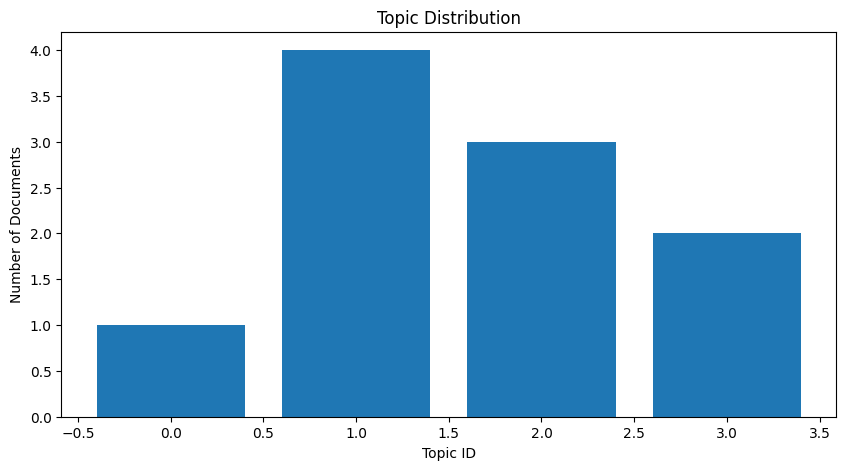

Could not create topic similarity visualization: Cannot use scipy.linalg.eigh for sparse A with k >= N. Use scipy.linalg.eigh(A.toarray()) or reduce k.


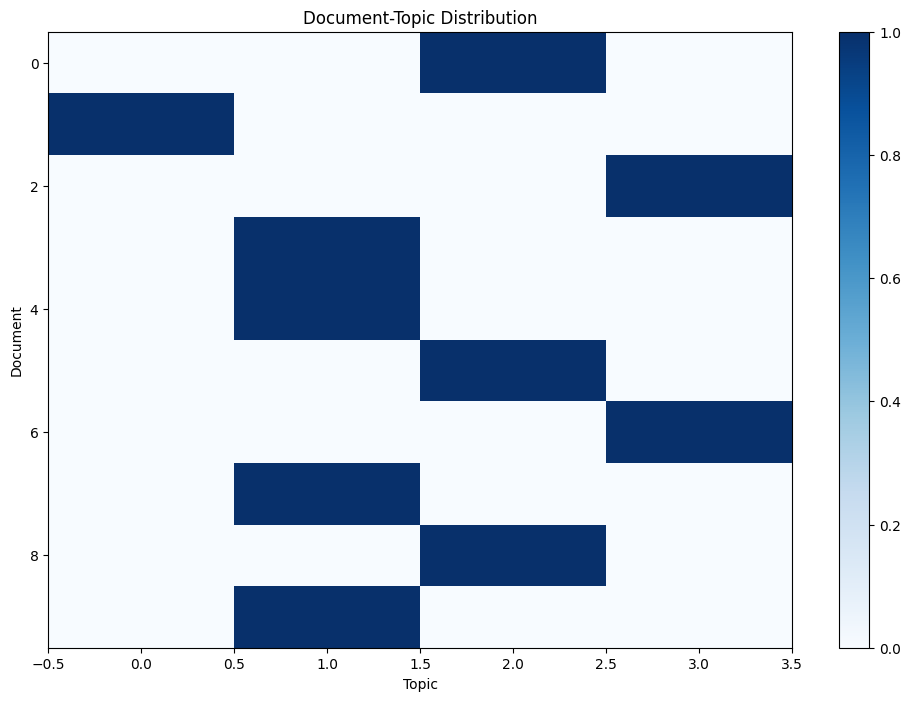

In [ ]:
# Write your code here\

!pip install bertopic
!pip install umap-learn
!pip install hdbscan
!pip install sentence-transformers
!pip install plotly


!pip install wordcloud
!pip install pyLDAvis

import numpy as np
import pandas as pd
from bertopic import BERTopic
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

texts = [
    "machine learning artificial intelligence data science algorithms",
    "deep learning neural networks ai training models prediction",
    "natural language processing text mining nlp tokens words",
    "data analysis visualization statistics regression classification",
    "computer vision image processing object detection recognition",
    "deep learning frameworks pytorch tensorflow keras implementation",
    "data preprocessing cleaning transformation feature engineering",
    "model evaluation metrics accuracy precision recall f1score",
    "neural network architecture layers activation functions",
    "machine learning pipeline data processing training deployment"
]


umap_model = UMAP(
    n_neighbors=2,  # Reducing from default
    n_components=2,  # Reducing dimensionality
    min_dist=0.0,
    metric='cosine',
    random_state=42
)


hdbscan_model = HDBSCAN(
    min_cluster_size=2,
    min_samples=1,
    metric='euclidean',
    cluster_selection_method='eom'
)

vectorizer_model = CountVectorizer(
    stop_words="english",
    min_df=2,
    ngram_range=(1, 2)
)


topic_model = BERTopic(
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    vectorizer_model=vectorizer_model,
    min_topic_size=2,
    nr_topics="auto",
    verbose=True
)

# Fitting the model
topics, probs = topic_model.fit_transform(texts)

# Printing topics
print("\nTopics found:")
topic_info = topic_model.get_topic_info()
print(topic_info)

print("\nTop words per topic:")
for topic_id in sorted(list(set(topics))):
    if topic_id != -1:
        words = topic_model.get_topic(topic_id)
        print(f"\nTopic {topic_id}:")
        print(", ".join([word[0] for word in words[:10]]))

# Basic visualizations are
# 1. Topic sizes
topic_sizes = [len([t for t in topics if t == topic_id]) for topic_id in sorted(list(set(topics)))]
plt.figure(figsize=(10, 5))
plt.bar(range(len(topic_sizes)), topic_sizes)
plt.xlabel('Topic ID')
plt.ylabel('Number of Documents')
plt.title('Topic Distribution')
plt.show()

# 2. Topic similarities
try:
    # Only create visualization if topics were found
    if len(set(topics)) > 1:
        fig = topic_model.visualize_topics()
        plt.show()
except Exception as e:
    print("Could not create topic similarity visualization here:", str(e))

# 3. Distribution
doc_info = topic_model.get_document_info(texts)
doc_topic_matrix = pd.crosstab(doc_info.Document, doc_info.Topic)
plt.figure(figsize=(12, 8))
plt.imshow(doc_topic_matrix, aspect='auto', cmap='Blues')
plt.colorbar()
plt.xlabel('Topic')
plt.ylabel('Document')
plt.title('Document-Topic Distribution')
plt.show()

## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [ ]:
"""BERTopic is the better choice for topic modeling because of its advanced semantic understanding and also beacuse of its robust performance across various scenarios. Traditional methods such as LDA and NMF are valuable for specific applications where computational efficiency and simplicity is preferred over absolute performance."""

'BERTopic is the better choice for topic modeling because of its advanced semantic understanding and also beacuse of its robust performance across various scenarios. Traditional methods such as LDA and NMF are valuable for specific applications where computational efficiency and simplicity is preferred over absolute performance.'

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
These topic modeling exercises helped me with practical experience with algorithms such as LSA, LDA, NMF, BERTopic, giving emphasis on their strengths, weaknesses, and also on real-world applications. The challenges like parameter tuning and preprocessing of very large datasets, improved problem-solving skills and deeper understanding of text analysis in NLP.
'''

'\nThese topic modeling exercises helped me with practical experience with algorithms such as LSA, LDA, NMF, BERTopic, giving emphasis on their strengths, weaknesses, and also on real-world applications. The challenges like parameter tuning and preprocessing of very large datasets, improved problem-solving skills and deeper understanding of text analysis in NLP.\n'